In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('./zhilian3.csv',encoding='utf_8_sig',header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,Python开发工程师,西安,6K-10K,1-3年,本科,2018-09-11,五险一金|绩效奖金|年终分红|弹性工作|补充医疗保险,西安鼎拓信息科技有限公司,20-99人,民营,https://jobs.zhaopin.com/636228122250066.htm
1,数据分析工程师,广州,6K-9K,不限,本科,2018-09-13,五险一金|周末双休|带薪年假|弹性工作|绩效奖金,华远智德(北京)科技有限公司,20-99人,民营,https://jobs.zhaopin.com/CZ773821670J000938793...
2,自动化测试脚本工程师,成都,10K-15K,不限,不限,2018-09-10,五险一金|绩效奖金|交通补助|带薪年假|弹性工作,沃奇卫士技术(北京)有限责任公司成都分公司,100-499人,外商独资,https://jobs.zhaopin.com/395810911250062.htm
3,System Engineer/系统工程师,武汉,7K-14K,不限,本科,2018-09-07,节日福利|五险一金|绩效奖金|股票期权|包吃,法雷奥舒适及驾驶辅助系统武汉技术中心,500-999人,外商独资,https://jobs.zhaopin.com/131332775250170.htm
4,诚聘c++工程师,广州,7.5K-15K,1-3年,不限,2018-09-13,五险一金|绩效奖金|加班补助|餐补|包住,广州中侠软件有限公司,20人以下,民营,https://jobs.zhaopin.com/CZ600434720J001358650...


In [4]:
df.shape

(39677, 11)

In [5]:
df.index=range(1,len(df)+1)

In [6]:
df.columns = ['岗位','城市','薪资','年限','学历','更新时间','福利','公司','规模','类型','链接']
df.head(5)

,岗位,城市,薪资,年限,学历,更新时间,福利,公司,规模,类型,链接
1,Python开发工程师,西安,6K-10K,1-3年,本科,2018-09-11,五险一金|绩效奖金|年终分红|弹性工作|补充医疗保险,西安鼎拓信息科技有限公司,20-99人,民营,https://jobs.zhaopin.com/636228122250066.htm
2,数据分析工程师,广州,6K-9K,不限,本科,2018-09-13,五险一金|周末双休|带薪年假|弹性工作|绩效奖金,华远智德(北京)科技有限公司,20-99人,民营,https://jobs.zhaopin.com/CZ773821670J000938793...
3,自动化测试脚本工程师,成都,10K-15K,不限,不限,2018-09-10,五险一金|绩效奖金|交通补助|带薪年假|弹性工作,沃奇卫士技术(北京)有限责任公司成都分公司,100-499人,外商独资,https://jobs.zhaopin.com/395810911250062.htm
4,System Engineer/系统工程师,武汉,7K-14K,不限,本科,2018-09-07,节日福利|五险一金|绩效奖金|股票期权|包吃,法雷奥舒适及驾驶辅助系统武汉技术中心,500-999人,外商独资,https://jobs.zhaopin.com/131332775250170.htm
5,诚聘c++工程师,广州,7.5K-15K,1-3年,不限,2018-09-13,五险一金|绩效奖金|加班补助|餐补|包住,广州中侠软件有限公司,20人以下,民营,https://jobs.zhaopin.com/CZ600434720J001358650...


In [7]:
df['bottom']=df['top']=df['avg']=df['薪资']
pattern = '(\d+\.?\d+|\d+)'
q1=q2=q3=q4=0

In [8]:
import re

In [12]:
for i in range(len(df['薪资'])):
    line = df['薪资'].iloc[i]
    try:
        res = re.findall(pattern, line)
        if res:
            if len(res) == 2:
                df['bottom'].iloc[i], df['top'].iloc[i] = res[0], res[1]
                df['avg'].iloc[i] = str((float(res[0]) + float(res[1])) / 2)
                q1 += 1
            elif len(res) == 1:
                df['bottom'].iloc[i] = df['top'].iloc[i] = df['avg'].iloc[i] = res[0]
                q2 += 1
        else:
            df['bottom'].iloc[i] = df['top'].iloc[i] = df['avg'].iloc[i] = line
            q3 += 1
    except:
        q4 +=1

In [13]:
df[['薪资','bottom','top','avg']].head(10)

,薪资,bottom,top,avg
1,6K-10K,6,10,8.0
2,6K-9K,6,9,7.5
3,10K-15K,10,15,12.5
4,7K-14K,7,14,10.5
5,7.5K-15K,7.5,15,11.25
6,8K-10K,8,10,9.0
7,12K-24K,12,24,18.0
8,7K-14K,7,14,10.5
9,4K-6K,4,6,5.0
10,10K-15K,10,15,12.5


In [14]:
q1,q2,q3,q4

(111911, 0, 1, 2)

In [16]:
len(df['城市'])

39677

In [15]:
df['城市'].value_counts()

北京        7860
成都        3146
广州        2358
杭州        2357
武汉        1970
郑州        1968
重庆        1959
上海        1574
长沙        1573
南京        1571
西安        1565
济南        1220
深圳        1178
合肥        1173
大连        1129
珠海         790
青岛         790
长春         785
贵阳         395
东莞         395
宁波         395
日本         395
哈尔滨        395
苏州         393
太原         390
无锡         390
呼和浩特       390
天津         390
西宁         390
沈阳         390
20-99人       1
Name: 城市, dtype: int64

In [23]:
df_城市 = df['城市'].replace(['20-99人'],np.nan)
len(df_城市.value_counts())

30

In [24]:
df_城市.value_counts()

北京      7860
成都      3146
广州      2358
杭州      2357
武汉      1970
郑州      1968
重庆      1959
上海      1574
长沙      1573
南京      1571
西安      1565
济南      1220
深圳      1178
合肥      1173
大连      1129
珠海       790
青岛       790
长春       785
宁波       395
日本       395
贵阳       395
东莞       395
哈尔滨      395
苏州       393
西宁       390
呼和浩特     390
无锡       390
天津       390
沈阳       390
太原       390
Name: 城市, dtype: int64

In [25]:
len(df_城市.value_counts())

30

In [26]:
q1+q2+q3

111912

([<matplotlib.patches.Wedge at 0x24e372e3e48>,
 [Text(0.974981,0.69958,'北京19.8%'),
  Text(0.0844944,1.09675,'成都7.9%'),
  Text(-0.386417,1.02989,'广州5.9%'),
  Text(-0.735444,0.817999,'杭州5.9%'),
  Text(-0.967517,0.523365,'武汉5.0%'),
  Text(-1.08143,0.201288,'郑州5.0%'),
  Text(-1.09115,-0.139253,'重庆4.9%'),
  Text(-1.01028,-0.435134,'上海4.0%'),
  Text(-0.871755,-0.670852,'长沙4.0%'),
  Text(-0.679585,-0.864965,'南京4.0%'),
  Text(-0.446147,-1.00546,''),
  Text(-0.2154,-1.0787,''),
  Text(-0.00792642,-1.09997,''),
  Text(0.195805,-1.08243,''),
  Text(0.388781,-1.029,''),
  Text(0.540063,-0.958296,''),
  Text(0.655424,-0.883413,''),
  Text(0.760225,-0.795021,''),
  Text(0.831086,-0.720622,''),
  Text(0.87451,-0.667257,''),
  Text(0.914514,-0.611281,''),
  Text(0.950939,-0.552914,''),
  Text(0.983645,-0.492384,''),
  Text(1.01243,-0.430088,''),
  Text(1.03714,-0.366529,''),
  Text(1.05778,-0.301813,''),
  Text(1.0744,-0.235945,''),
  Text(1.08691,-0.169178,''),
  Text(1.09528,-0.101766,''),
  Text(1.

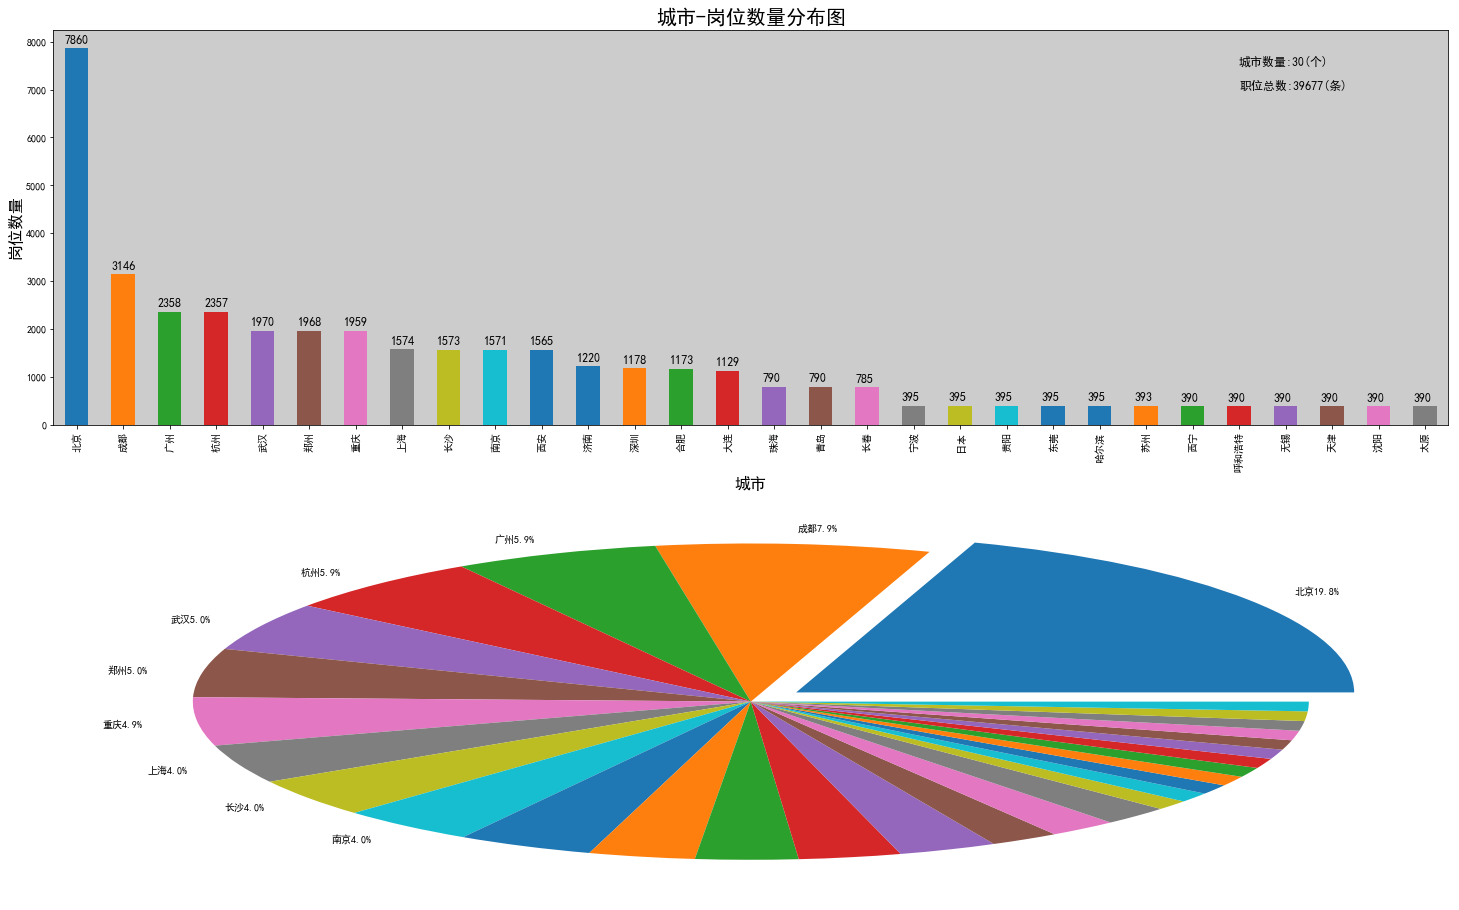

In [28]:
fig1 = plt.figure(figsize=(25,16),facecolor='white')
ax1 = fig1.add_subplot(2,1,1,facecolor='#cccccc',alpha=0.2)
from pylab import mpl 
mpl.rcParams['font.sans-serif']=['SimHei']
df_城市.value_counts().plot(kind='bar')
plt.title('城市-岗位数量分布图',fontsize=20)
plt.xlabel('城市',fontsize=16)
plt.ylabel('岗位数量',fontsize=16)
city_list = list(df_城市.value_counts())
for i in range(len(city_list)):
    ax1.text(i-0.25,city_list[i]+100,city_list[i],fontsize=12)
ax1.text(25,7500,'城市数量:30(个)',fontsize=12)
ax1.text(25,7000,'职位总数:39677(条)',fontsize=12)

ax2 = fig1.add_subplot(2,1,2)
x = df_城市.value_counts().values
label_list = []
for i in range(10):
    t=df_城市.value_counts().values[i]/df_城市.value_counts().sum()*100
    city = df_城市.value_counts().index[i]
    percent = str('%.1f%%'%t)
    label_list.append(city+percent)
labels = label_list + ['']*(len(city_list)-10)
explode = tuple([0.1] + [0]*(len(city_list)-1))
plt.pie(x,explode=explode,labels=labels)

In [29]:
df.年限.value_counts()

不限                                                      21566
1-3年                                                     9446
3-5年                                                     7090
无经验                                                       786
5-10年                                                     393
1年以下                                                      393
https://jobs.zhaopin.com/CC643811139J00068461915.htm        1
Name: 年限, dtype: int64

In [30]:
df_年限 = df.年限.replace(['https://jobs.zhaopin.com/CC643811139J00068461915.htm'],np.nan)
df_年限.value_counts()

不限       21566
1-3年      9446
3-5年      7090
无经验        786
5-10年      393
1年以下       393
Name: 年限, dtype: int64

In [31]:
df_年限.value_counts().sum()

39674

In [32]:
df_年限.value_counts().index

Index(['不限', '1-3年', '3-5年', '无经验', '5-10年', '1年以下'], dtype='object')

In [33]:
df_年限.value_counts()

不限       21566
1-3年      9446
3-5年      7090
无经验        786
5-10年      393
1年以下       393
Name: 年限, dtype: int64

([<matplotlib.patches.Wedge at 0x24e378fc6a0>,
 [Text(-0.163781,1.18877,'不限'),
  Text(-0.626192,-1.02366,'1-3年'),
  Text(0.827067,-0.86946,'3-5年'),
  Text(1.17914,-0.222763,'无经验'),
  Text(1.19477,-0.111869,'5-10年'),
  Text(1.19942,-0.0373378,'1年以下')],
 [Text(-0.0955387,0.69345,'54.4%'),
  Text(-0.365279,-0.597136,'23.8%'),
  Text(0.482456,-0.507185,'17.9%'),
  Text(0.687833,-0.129945,'2.0%'),
  Text(0.696952,-0.0652567,'1.0%'),
  Text(0.699661,-0.0217804,'1.0%')])

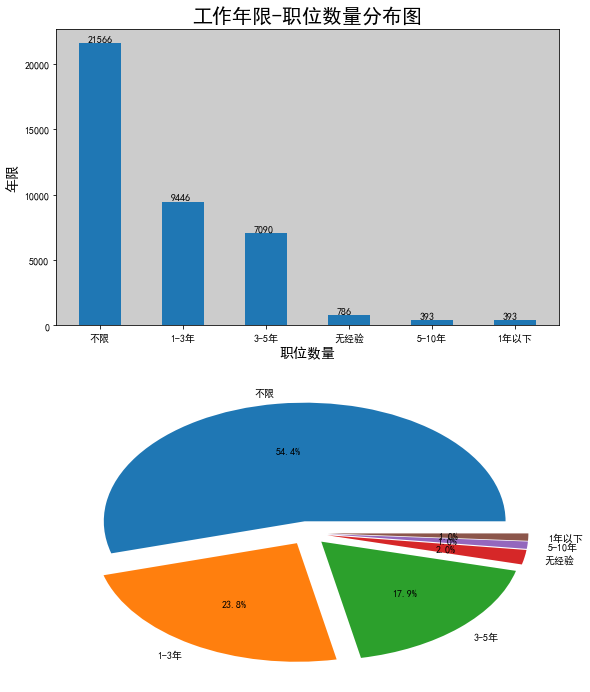

In [34]:
fig2 = plt.figure(figsize=(9,12),facecolor='white')
ax2_1 = fig2.add_subplot(2,1,1,facecolor='#cccccc')
plt.bar(df_年限.value_counts().index,df_年限.value_counts(),width=0.5)
plt.title('工作年限-职位数量分布图',fontsize=20)
plt.xlabel('职位数量',fontsize=14)
plt.ylabel('年限',fontsize=14)
for i in range(len(df_年限.value_counts())):
    plt.text(i-0.15,df_年限.value_counts()[i]+100,df_年限.value_counts()[i])

ax2_2 = fig2.add_subplot(2,1,2)
x2 = df_年限.value_counts()
labels = list(df_年限.value_counts().index)
explode = tuple([0.1]*len(x2))
plt.pie(x2,explode=explode,labels=labels,autopct='%1.1f%%')

In [35]:
df.avg.value_counts()

8.9      9360
5.0      4723
7.0      3936
12.5     2414
11.5     1971
20.0     1574
22.5     1572
6.0      1571
9.0      1529
10.5     1185
17.5     1182
11.0     1181
25.0     1181
15.0     1173
4.0       788
8.0       785
10.0      395
11.25     395
18.0      395
40.0      395
5.25      395
7.5       395
5.5       393
19.0      393
4.5       393
合资          1
Name: avg, dtype: int64

In [36]:
df_avg = df.avg.replace(['合资'])
df_avg.value_counts()

8.9      9360
5.0      4723
7.0      3936
12.5     2415
11.5     1971
20.0     1574
22.5     1572
6.0      1571
9.0      1529
10.5     1185
17.5     1182
25.0     1181
11.0     1181
15.0     1173
4.0       788
8.0       785
18.0      395
11.25     395
7.5       395
10.0      395
40.0      395
5.25      395
5.5       393
19.0      393
4.5       393
Name: avg, dtype: int64

In [37]:
df3 = pd.DataFrame(data={'年限':df_年限,'平均月薪':df_avg})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39677 entries, 1 to 39677
Data columns (total 2 columns):
年限      39674 non-null object
平均月薪    39675 non-null object
dtypes: object(2)
memory usage: 620.0+ KB


In [38]:
df3['平均月薪']=[float(i) for i in df3['平均月薪']]

In [39]:
df3.head(10)

,年限,平均月薪
1,1-3年,8.00
2,不限,7.50
3,不限,12.50
4,不限,10.50
5,1-3年,11.25
6,1-3年,9.00
7,3-5年,18.00
8,1-3年,10.50
9,1-3年,5.00
10,3-5年,12.50


In [40]:
type(df3['平均月薪'].iloc[0])

numpy.float64

In [41]:
group3 = df3['平均月薪'].groupby(df3['年限'])
group3.mean()

年限
1-3年     12.834030
1年以下      6.000000
3-5年     17.975599
5-10年    20.000000
不限        7.629544
无经验       5.500000
Name: 平均月薪, dtype: float64

In [42]:
df3['平均月薪'].mean()

10.781839949590422

In [43]:
s3 = pd.Series(data = {'平均值':df3['平均月薪'].mean()})
res3 = group3.mean().append(s3)
res = res3.sort_values(ascending=True).round(2)
res

无经验       5.50
1年以下      6.00
不限        7.63
平均值      10.78
1-3年     12.83
3-5年     17.98
5-10年    20.00
dtype: float64

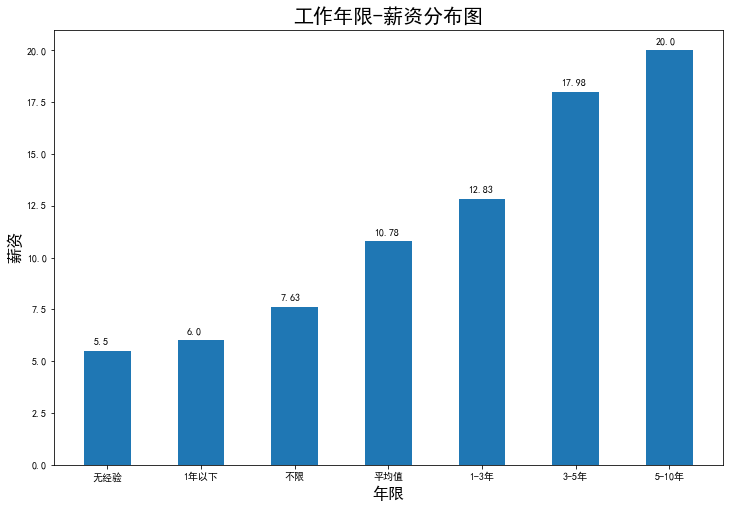

In [44]:
fig3 = plt.figure(figsize=(12,8),facecolor='white')
plt.bar(res.index,res,width=0.5)
plt.title('工作年限-薪资分布图',fontsize=20)
plt.xlabel('年限',fontsize=16)
plt.ylabel('薪资',fontsize=16)
for i in range(len(res)):
    plt.text(i-0.15,res[i]+0.3,res[i])

In [45]:
df4=pd.DataFrame(data={'城市':df_城市,'平均薪资':df3['平均月薪']})
df4.head(10)

,城市,平均薪资
1,西安,8.00
2,广州,7.50
3,成都,12.50
4,武汉,10.50
5,广州,11.25
6,长沙,9.00
7,北京,18.00
8,武汉,10.50
9,长春,5.00
10,郑州,12.50


In [46]:
group4 = df4['平均薪资'].groupby(df4['城市'])
group4.mean()

城市
上海      14.631830
东莞       9.000000
北京      18.504517
南京       8.978358
合肥       7.258312
呼和浩特     8.900000
哈尔滨      5.000000
大连       9.661647
天津       8.900000
太原       8.900000
宁波       5.000000
广州       8.367154
成都       7.974253
无锡       8.900000
日本      17.500000
杭州       7.651252
武汉      10.082995
沈阳       8.900000
济南       7.161475
深圳      12.516553
珠海       8.875000
苏州       5.000000
西宁       8.900000
西安       8.448562
贵阳      11.500000
郑州       9.182927
重庆       8.258040
长春       6.937580
长沙       8.603624
青岛       5.500000
Name: 平均薪资, dtype: float64

In [47]:
df4['平均薪资'].mean()

10.781839949590422

In [48]:
s4 = pd.Series(data={'平均值':df4['平均薪资'].mean()})
res4 = group4.mean().append(s4)
res = res4.sort_values(ascending=True).round(2)
res

苏州       5.00
哈尔滨      5.00
宁波       5.00
青岛       5.50
长春       6.94
济南       7.16
合肥       7.26
杭州       7.65
成都       7.97
重庆       8.26
广州       8.37
西安       8.45
长沙       8.60
珠海       8.88
太原       8.90
无锡       8.90
呼和浩特     8.90
沈阳       8.90
西宁       8.90
天津       8.90
南京       8.98
东莞       9.00
郑州       9.18
大连       9.66
武汉      10.08
平均值     10.78
贵阳      11.50
深圳      12.52
上海      14.63
日本      17.50
北京      18.50
dtype: float64

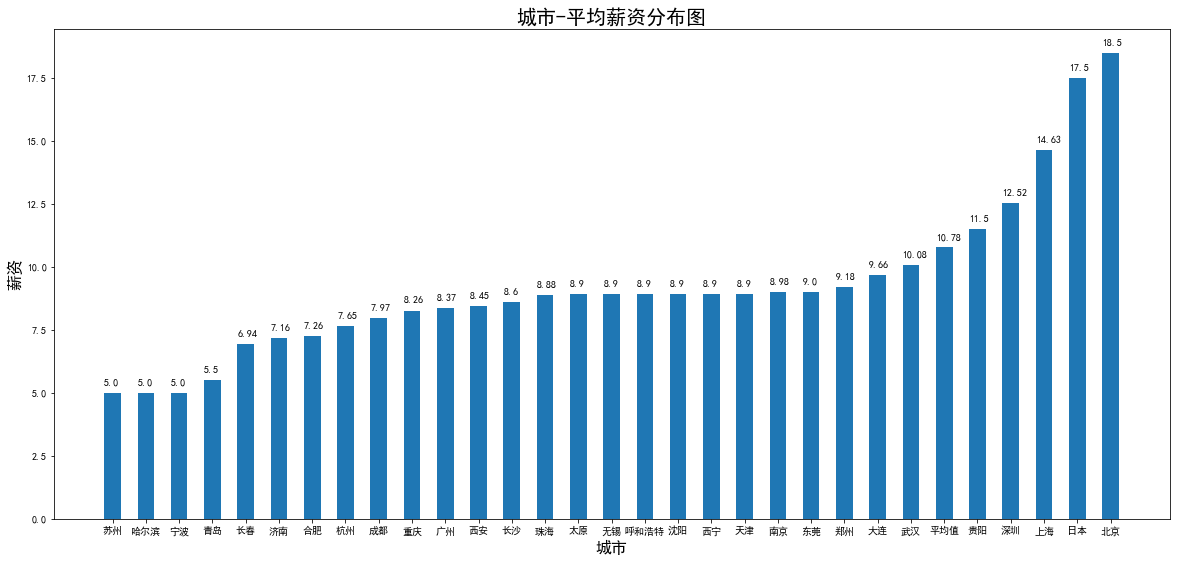

In [49]:
fig4 = plt.figure(figsize=(20,9),facecolor='white')
plt.bar(res.index,res,width=0.5)
plt.title('城市-平均薪资分布图',fontsize=20)
plt.xlabel('城市',fontsize=16)
plt.ylabel('薪资',fontsize=16)
for i in range(len(res)):
    plt.text(i-0.25,res[i]+0.3,res[i])

In [50]:
df5 = df[df['城市']=='长沙'][['年限']]
df6 = df[df['城市']=='深圳'][['年限']]

In [51]:
df5['年限'].value_counts()

不限      783
3-5年    395
1-3年    395
Name: 年限, dtype: int64

In [52]:
df6['年限'].value_counts()

1-3年    788
不限      390
Name: 年限, dtype: int64